In [2]:
import pandas as pd
from faker import Faker
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fake = Faker('pl_PL')

In [3]:
df = pd.read_csv('data.csv', sep=';')
len(df)

140

In [4]:
df['gender'] = df['gender'].apply(lambda x : 'Female' if x == 1.0  else 'Male')

In [5]:
df.head(3)

,age,edu_level,fav_animals,fav_place,gender,hobby_art,hobby_books,hobby_movies,hobby_other,hobby_sport,...,learning_pref_teamwork,learning_pref_workshops,motivation_career,motivation_challenges,motivation_creativity_and_innovation,motivation_money_and_job,motivation_personal_growth,motivation_remote,sweet_or_salty,years_of_experience
0,<18,Podstawowe,Brak ulubionych,NaN,Female,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0-2
1,25-34,Średnie,Psy,Nad wodą,Male,0,0,1,0,0,...,1,1,0,1,0,0,1,0,sweet,11-15
2,45-54,Wyższe,Psy,W lesie,Male,0,0,1,0,0,...,1,1,0,1,0,1,1,0,salty,>=16


In [6]:
def edu_replace(df):
    if df == 'Wyższe': return 'College'
    elif df == 'Średnie': return 'Secondary'
    else: return 'Primary'

edu_replace('Podstawowe')

df['edu_level'] = df['edu_level'].apply(edu_replace)

In [7]:
df.edu_level.value_counts()

edu_level
College      110
Secondary     29
Primary        1
Name: count, dtype: int64

In [8]:
df.gender.value_counts()

gender
Male      108
Female     32
Name: count, dtype: int64

In [9]:
df.fav_animals.value_counts()

fav_animals
Psy                75
Inne               21
Koty               21
Brak ulubionych    19
Koty i Psy          4
Name: count, dtype: int64

In [10]:
def translate_animals(df):
    if df == 'Psy': return 'Dogs'
    elif df == 'Koty': return 'Cats'
    elif df == 'Inne': return 'Other'
    elif df == 'Koty i Psy': return 'Cats and Dogs'
    else: return 'No preferences'

df['fav_animals'] = df['fav_animals'].apply(translate_animals)

In [11]:
df['sweet_or_salty'] = df['sweet_or_salty'].str.capitalize() 
df['age'] = df['age'].str.capitalize()
df['sweet_or_salty'] = df['sweet_or_salty'].fillna('No data')
df['fav_place'] = df['fav_place'].fillna('No data')

df[['sweet_or_salty', 'fav_place']].head(3)

,sweet_or_salty,fav_place
0,No data,No data
1,Sweet,Nad wodą
2,Salty,W lesie


In [12]:
df['fav_place'].unique()

array(['No data', 'Nad wodą', 'W lesie', 'W górach', 'Inne'], dtype=object)

In [13]:
def translate_fav_place(df):
    if df == 'Nad wodą': return 'Lake'
    elif df == 'W lesie': return 'Forest'
    elif df == 'W górach': return 'Mountains'
    elif df == 'No data': return 'No data'
    else: return 'Other'

df['fav_place'] = df['fav_place'].apply(translate_fav_place)
df['fav_place']

0        No data
1           Lake
2         Forest
3      Mountains
4           Lake
         ...    
135    Mountains
136    Mountains
137       Forest
138         Lake
139    Mountains
Name: fav_place, Length: 140, dtype: object

In [14]:
df['name'] = np.nan

In [15]:
f_names = [fake.first_name_female() for x in range(len(df[df['gender'] == 'Female']))]

In [16]:
df.loc[df[df['gender'] == 'Female'].index, 'name'] = f_names

C:\Users\lolek\AppData\Local\Temp\ipykernel_13332\2836971342.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Róża', 'Karina', 'Angelika', 'Kornelia', 'Róża', 'Agnieszka', 'Olga', 'Janina', 'Anna Maria', 'Aurelia', 'Ewa', 'Apolonia', 'Tola', 'Dagmara', 'Justyna', 'Liwia', 'Lidia', 'Olga', 'Janina', 'Melania', 'Aurelia', 'Malwina', 'Krystyna', 'Justyna', 'Aurelia', 'Apolonia', 'Krystyna', 'Angelika', 'Aniela', 'Dagmara', 'Dagmara', 'Angelika']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[df['gender'] == 'Female'].index, 'name'] = f_names


In [17]:
m_names = [fake.first_name_male() for x in range(len(df[df['gender'] == 'Male']))]

In [18]:
df.loc[df[df['gender'] == 'Male'].index, 'name'] = m_names

In [21]:
df = df[['name', 'gender', 'age', 'edu_level', 'fav_animals',
              'sweet_or_salty', 'fav_place',]]

In [22]:
df.to_csv('data_prepared.csv', sep=';', index=False)

In [93]:
df[df.sweet_or_salty == 'No data']

,name,gender,age,edu_level,fav_animals,motivation_money_and_job,sweet_or_salty,fav_place
0,Marianna,Female,<18,Primary,No preferences,Hobby,No data,No data
5,Maciej,Male,25-34,College,Dogs,Hobby,No data,Forest
10,Piotr,Male,35-44,College,No preferences,Hobby,No data,Mountains
14,Tomasz,Male,45-54,College,Other,Hobby,No data,Lake
30,Ksawery,Male,55-64,College,Other,Carrer,No data,No data
38,Marek,Male,45-54,Secondary,Dogs,Hobby,No data,Mountains
48,Marcel,Male,Unknown,College,No preferences,Hobby,No data,No data
62,Ewelina,Female,35-44,Secondary,No preferences,Hobby,No data,No data
102,Konstanty,Male,35-44,College,No preferences,Carrer,No data,No data
115,Franciszek,Male,25-34,College,Cats,Hobby,No data,No data


<Axes: title={'center': 'Age histogram'}, xlabel='Age', ylabel='Age count'>

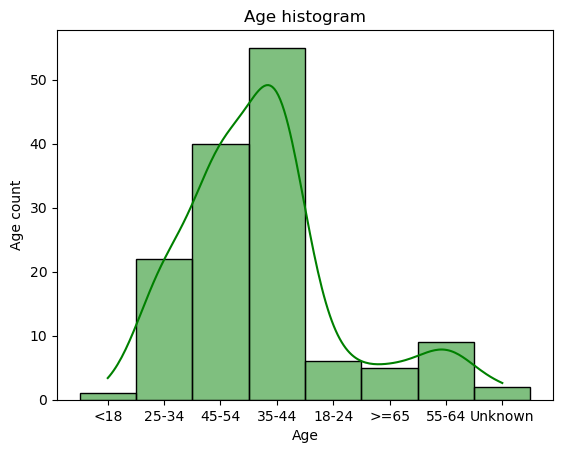

In [112]:

plt.title('Age histogram')
plt.ylabel('Age count')
plt.xlabel('Age')
sns.histplot(data=df, x='age', kde=True, color='g')

In [113]:
df.columns

Index(['name', 'gender', 'age', 'edu_level', 'fav_animals',
       'motivation_money_and_job', 'sweet_or_salty', 'fav_place'],
      dtype='object')